In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

data= pd.read_csv('Salary_Data.csv')

In [105]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Transformer les colonnes du dataframe en matrices

In [106]:
years_experience= data['YearsExperience'].values
salary= data['Salary'].values


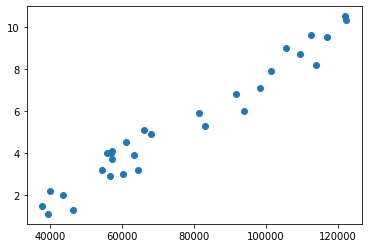

In [107]:
plt.scatter(salary, years_experience)

In [108]:
#vérifier la taille des matrices
print(years_experience.shape)
print (salary.shape)

(30,)
(30,)


Redimmentionner les matrices

In [109]:
salary=salary.reshape(salary.shape[0],1)
print(salary.shape)
years_experience=years_experience.reshape(years_experience.shape[0],1)
print(years_experience.shape)

(30, 1)
(30, 1)


Création d'une matrice X

In [110]:
X = np.hstack((salary, np.ones(salary.shape)))
X.shape

(30, 2)

In [111]:
np.random.seed(0)# pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2,1)* 1200000
theta

array([[2116862.8151612 ],
       [ 480188.65004067]])

In [112]:
def model(salary, theta):
    return salary.dot(theta)

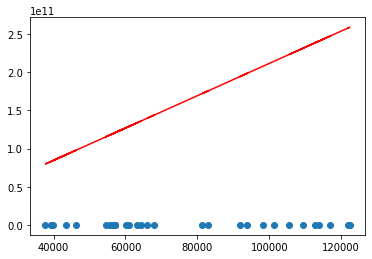

In [113]:
plt.scatter(salary,years_experience)
plt.plot(salary, model(X, theta),c ='r')

Fonction coût : erreur quadratique moyenne

In [122]:
def cost_function(X, years_experience, theta):
    m = len(years_experience)
    return 1/(2*m) * np.sum((model(X, theta) - years_experience)**2)



In [123]:
cost_function(X, years_experience, theta)



1.4570300278775591e+22

Gradients

In [124]:
def grad(X, years_experience, theta):
    m = len(years_experience)
    return 1/m * X.T.dot(model(X, theta) - years_experience)

Descente de gradient

In [126]:
def gradient_descent(X, years_experience, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, years_experience, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, years_experience, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

Entrainement

In [128]:
n_iterations = 1000
learning_rate = 0.01
